Taller 1.3 Dinámica
Andrea Sofía Daza
202122293

In [1]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt

Punto b

4. Grafique la posición de la masa B (rojo) para valores de s entre 100m y 400mm. Para el
instante en el que s=225mm, encuentre la posición de la masa B.

Valores de alpha (en grados): [68.19859051364818, 67.60240204717516, 67.01128319791937, 66.42529379808738, 65.84448835471062, 65.2689161541368, 64.69862137458027, 64.13364320590549, 63.574015975833134, 63.019769281777144, 62.470928127543374, 61.92751306414704, 61.38954033403479, 60.85702201802826, 60.32996618433945, 59.808377039042405, 59.29225507742156, 58.781597235653635, 58.27639704231597, 57.77664476925213, 57.28232758136066, 56.79342968491048, 56.309932474020215, 55.83181467497466, 55.35905248808371, 54.891619726822185, 54.4294879540193, 53.9726266148964, 53.52100316677918, 53.07458320533762, 52.6333305872313, 52.19720754906148, 51.766174822553054, 51.34019174590991, 50.919216371305524, 50.50320556848864, 50.09211512449896, 49.68589983950271, 49.28451361877061, 48.88790956083307, 48.49604004185735, 48.10885679630127, 47.72631099390627, 47.3483533130996, 46.97493401088198, 46.60600298928225, 46.24150985846518, 45.88140399658214, 45.52563460645762, 45.1741507692066, 44.8269014948798

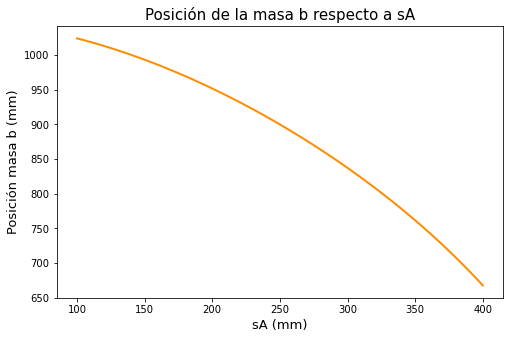

In [41]:
import numpy as np

h = 250
sA_i = 100
l = 1050
alpha = np.arctan(h / sA_i)
alpha_g = np.rad2deg(alpha)

sA_valores = np.linspace(100, 400, 100)

alpha_valores = []
x_valores = []
y_valores = []
omega_valores = []
sb_valores = []  # Aquí almacenaremos los valores de sb

for sA in sA_valores:
    alpha = np.arctan(h / sA)
    alpha_g = np.rad2deg(alpha)
    alpha_valores.append(alpha_g)
    
    x = h / np.sin(alpha)
    x_valores.append(x)
    
    y = abs(l - x)
    y_valores.append(y)
    
    omega = np.arcsin(sA / y)
    omega_g = np.rad2deg(omega)
    omega_valores.append(omega_g)
    
    sb = h+(sA / np.tan(omega)) # Cálculo de sb
    sb_valores.append(sb)

print("Valores de alpha (en grados):", alpha_valores)
print("Valores de x:", x_valores)
print("Valores de y:", y_valores)
print("Valores de omega (en grados):", omega_valores)
print("Valores de sb:", sb_valores)  # Imprime los valores de sb

x = sA_valores
y = sb_valores
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))
plt.title('Posición de la masa b respecto a sA', fontsize=15) # Título
plt.ylabel('Posición masa b (mm)', fontsize=13) # Etiqueta eje vertical
plt.xlabel('sA (mm)', fontsize=13) # Etiqueta eje horizontal
plt.plot(x, y, color='darkorange', linewidth=2)

#Hallar el valor de SB cuando sA = 225
sA = 225
alpha = np.arctan(h / sA)
x = h / np.sin(alpha)
y = abs(l - x)
omega = np.arcsin(sA / y)
sb = sA / np.tan(omega)

#Nota: el punto de referencia es donde está el punto C, por lo cual la distancia de la masa B irá disminuyendo, siendo el punto inicial de B la distancia máxima.


5. En el instante en que s = 225 mm el actuador se está retrayendo a una velocidad de 100 mm/s. Usted quiere llevar el actuador a alcanzar una velocidad de 500 mm/s en al menos un segundo y para esto acelera de manera constante. Encuentre qué tensión tendría la cuerda en este instante suponiendo que no hay fricción. 

In [47]:
#Aceleración= delta velocidad/delta tiempo
v_f = 500
v_i = 100
d_tiempo = 1

acel = v_f-v_i/d_tiempo
#Debo convertir de mm/s^2 a m/s
acel_1 = acel/1000
acel

sA_1 = 225
alpha_1 = np.arctan(h / sA_1)
x_1 = h / np.sin(alpha_1)
y_1 = abs(l - x_1)
omega_1 = np.arcsin(sA_1 / y_1)
omega_g_1 = np.rad2deg(omega_1)

Ft = acel_1/(np.cos(alpha)+np.cos(np.deg2rad(90-omega_g_1)))
#Unidades de Ft son Newtons
Ft

0.4064044550022179

6. Encuentre qué tensión tendría la cuerda para el punto anterior si suponemos una fricción u = 0.4 actuando entre la guía y el deslizador B.

In [50]:
#Se toma el valor de aceleración calculado en el punto anterior 
#Valor de masa es conocido

#Se despeja Ft de la siguiente ecuación: Ft(sen(80-omega)) + (coeficiente de fricción)(m)(g) -  (m)(g) = (m)(a)
m = 0.5 
g = 9.81
coef = 0.4
Ft_f = (m*acel_1+m*g+coef*m*g)/(np.sin(np.deg2rad(90-omega_g_1)))

Ft_f

7.446787076086415

7. Presente la tensión en función del tiempo desde que el actuador comienza a acelerar hasta que alcanza los 500 mm/s. En una misma gráfica muestre el resultado para el caso con fricción y para el caso sin fricción. 